In [1]:
#Code Written by Matthew Miller, adapted from Diana Lewis and chatgpt
import numpy as np
import os
import cv2
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras import layers, models 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Input Images from File to train the model 
# Specify the folder containing the images and CSV file
folder_path = 'Glaucoma_Balanced_Dataset/Preprocessed_images_input_to_bound'

# Load preprocessed images
images = []
for i in range(30):  # Assuming 30 images starting from 000000
    image_filename = f'enhanced_TRAIN{i:06d}.jpg'  # Zero-padded 6-digit number
    image_path = os.path.join(folder_path, image_filename)
    image = cv2.imread(image_path)
    images.append(image)
    
# Load bounding box labels from CSV file
bounding_box_labels = []
image_filenames = []  # List to store image filenames
csv_file = os.path.join(folder_path, 'Glaucoma30_bounding_boxes_06Apr2024.csv')
with open(csv_file, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip header row
    for row in csvreader:
        # Extract image filename from column 4 (assuming 0-based indexing)
        image_filename = row[3].strip()  # Remove leading/trailing whitespaces
        image_filenames.append(image_filename)  # Add filename to the list
        # Extract bounding box parameters from the "rect" column
        bbox_params = eval(row[5])  # Assuming "rect" is the 6th column
        # Extract individual bounding box parameters from the list of dictionaries
        bbox_dict = bbox_params[0]  # Assuming there's only one dictionary in the list
        x = int(bbox_dict['x'])
        y = int(bbox_dict['y'])
        width = int(bbox_dict['width'])
        height = int(bbox_dict['height'])

        ##### Adjust bounding box parameters (trial and error)
        #x_adjusted = x * 21  # Adjust x-coordinate by adding 10 pixels
        #y_adjusted = y * 10 # Adjust y-coordinate by adding 10 pixels
        #width_adjusted = width * 21  # Adjust width by scaling by a factor of 1.1
        #height_adjusted = height * 10  # Adjust height by scaling by a factor of 1.1
        ##### Add bounding box parameters to the list
        #bounding_box_labels.append([x, y, width, height])
        
        
        
        #Matt found the real way to deal the image image size mismatch
        #label studio just gives the percentages of the overall image size for the bounding box
        #Here's the non trial and error method:
        
        #These are needed to show what image size the boxes have to go back to
        original_width = 2048
        original_height = 1024
        
        
        x_adjusted = int(x / 100.0 * original_width)
        y_adjusted = int(y / 100.0 * original_height)
        width_adjusted = int(width / 100.0 * original_width)
        height_adjusted = int(height / 100.0 * original_height)
        
        
        
        
        
        
        bounding_box_labels.append([x_adjusted, y_adjusted, width_adjusted, height_adjusted])

        # Process bounding box parameters as needed
        # Example: Print adjusted bounding box parameters
        '''print(f"Image: {image_filename}, Adjusted Bounding Box: x={x_adjusted}, y={y_adjusted}, "
                  f"width={width_adjusted}, height={height_adjusted}")
                    '''
# Convert bounding box labels to numpy array
labels = np.array(bounding_box_labels)



In [3]:
# Load bounding box labels from CSV file
csv_file = os.path.join(folder_path, 'Glaucoma30_bounding_boxes_06Apr2024.csv')
with open(csv_file, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip header row
    for row in csvreader:
        # Extract image filename from the 4th column
        image_filename = row[3]  # Assuming image filename is in the 4th column
        print("Image filename from CSV:", image_filename)
        
        # Find the index of the image filename in the list of image filenames
        image_index = [i for i, filename in enumerate(image_filenames) if filename == image_filename]
        print("Index of image filename:", image_index)
        
        # Print the bounding box label corresponding to the image
        bounding_box_label = bounding_box_labels[image_index[0]]
        print("Bounding box label:", bounding_box_label)

Image filename from CSV: enhanced_TRAIN000000.jpg
Index of image filename: [0]
Bounding box label: [245, 235, 327, 368]
Image filename from CSV: enhanced_TRAIN000001.jpg
Index of image filename: [1]
Bounding box label: [1433, 194, 327, 337]
Image filename from CSV: enhanced_TRAIN000002.jpg
Index of image filename: [2]
Bounding box label: [512, 440, 225, 235]
Image filename from CSV: enhanced_TRAIN000003.jpg
Index of image filename: [3]
Bounding box label: [430, 235, 307, 358]
Image filename from CSV: enhanced_TRAIN000004.jpg
Index of image filename: [4]
Bounding box label: [1187, 337, 245, 256]
Image filename from CSV: enhanced_TRAIN000005.jpg
Index of image filename: [5]
Bounding box label: [1249, 378, 266, 286]
Image filename from CSV: enhanced_TRAIN000006.jpg
Index of image filename: [6]
Bounding box label: [1228, 153, 450, 450]
Image filename from CSV: enhanced_TRAIN000007.jpg
Index of image filename: [7]
Bounding box label: [1331, 184, 348, 368]
Image filename from CSV: enhanced_T

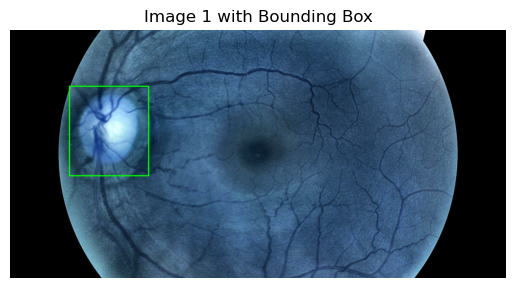

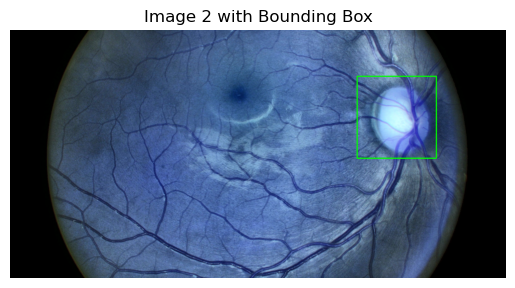

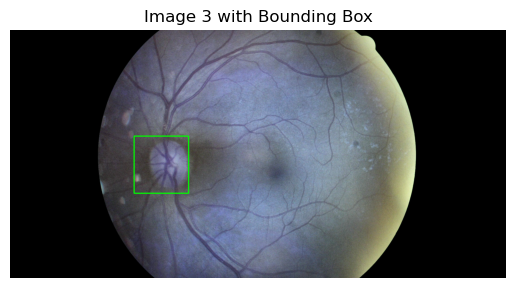

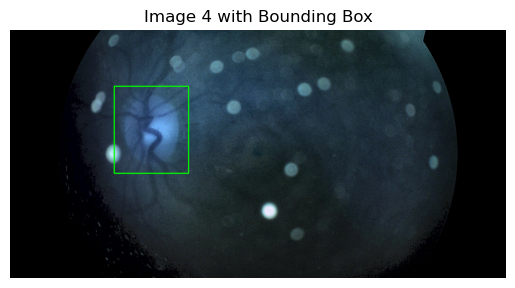

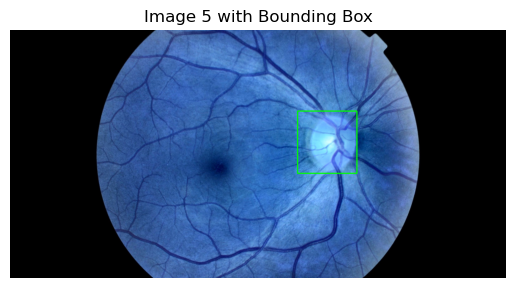

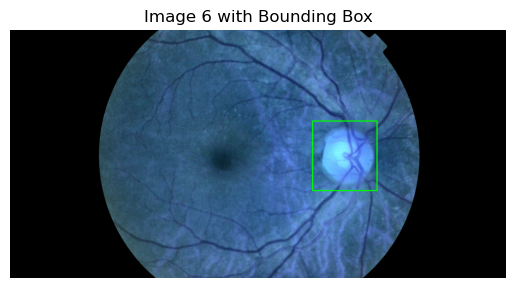

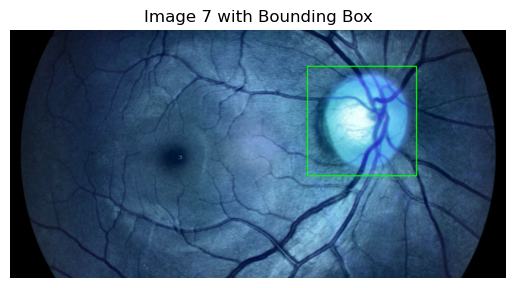

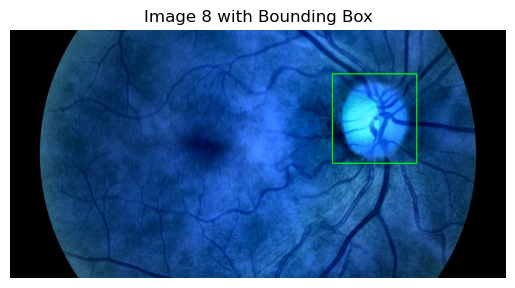

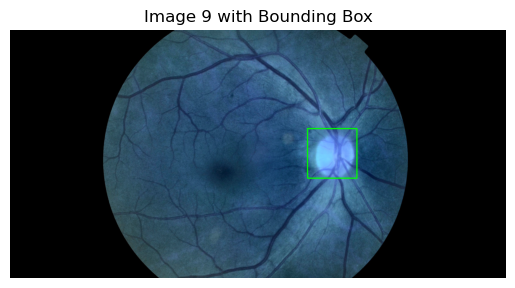

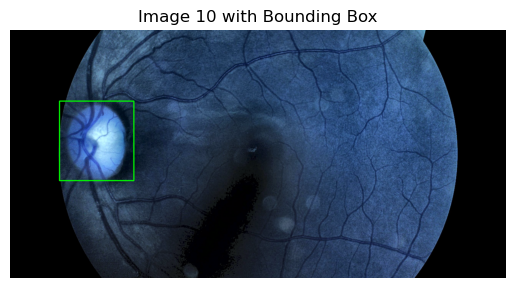

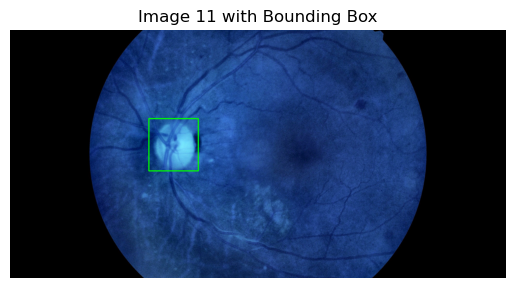

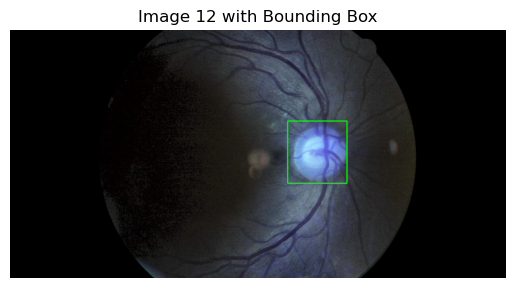

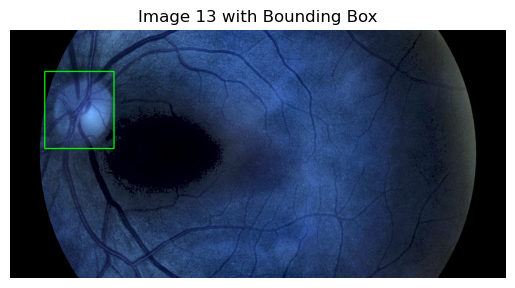

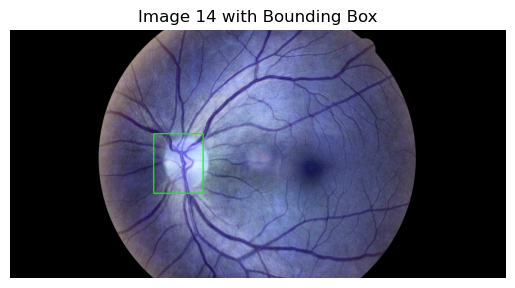

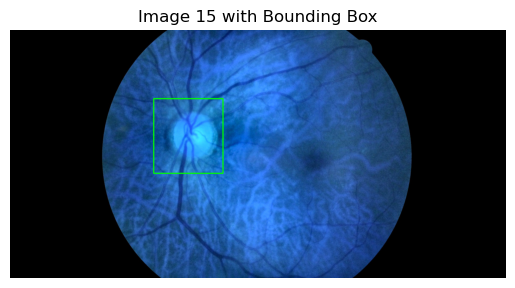

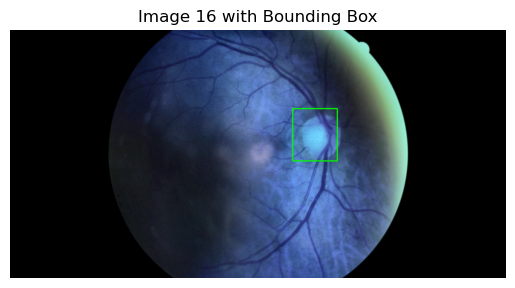

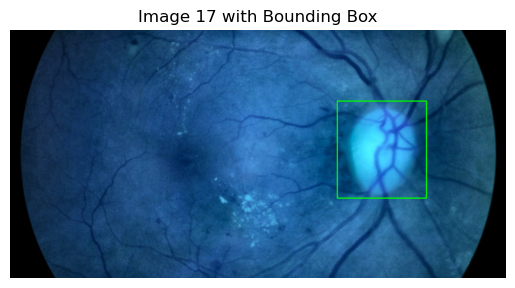

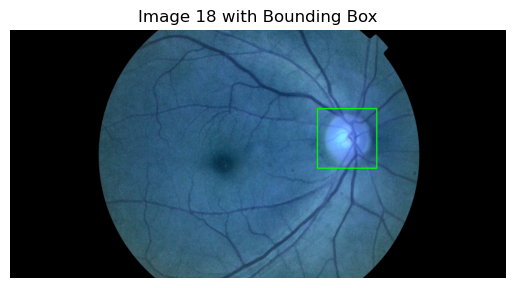

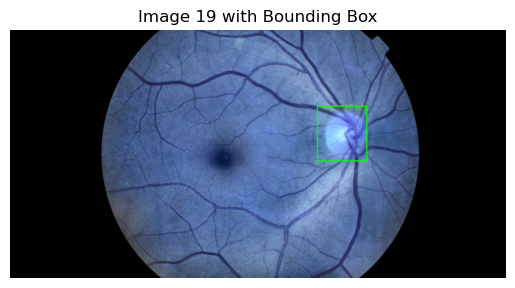

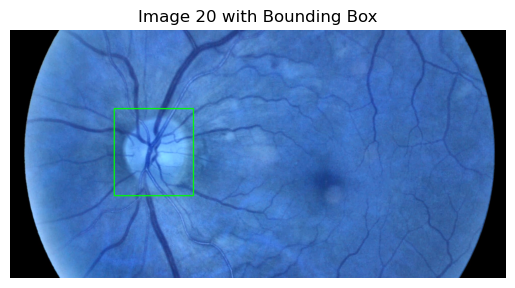

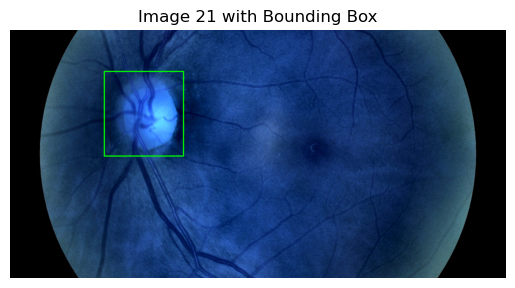

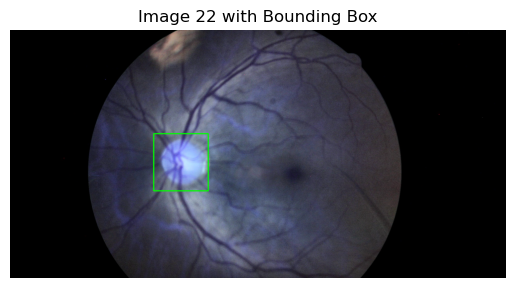

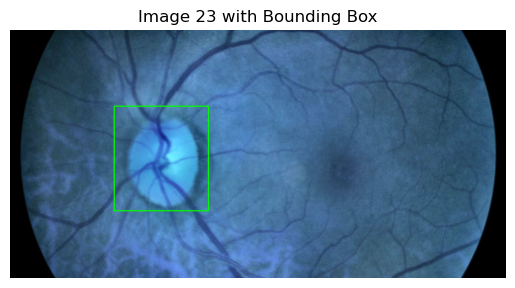

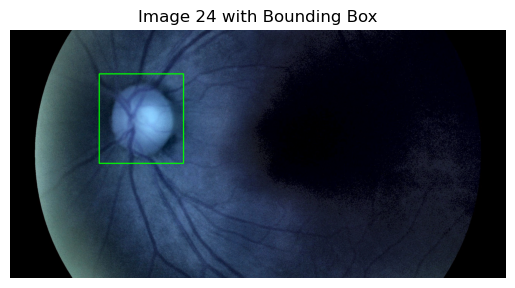

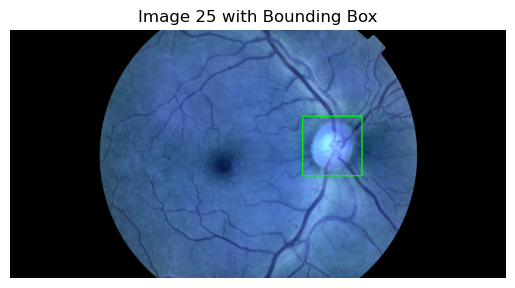

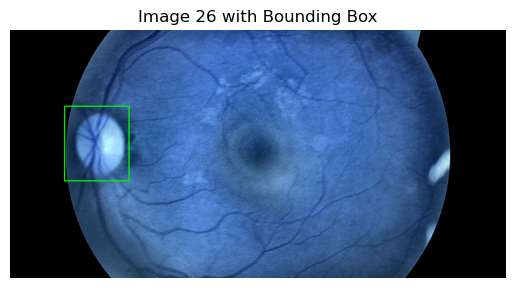

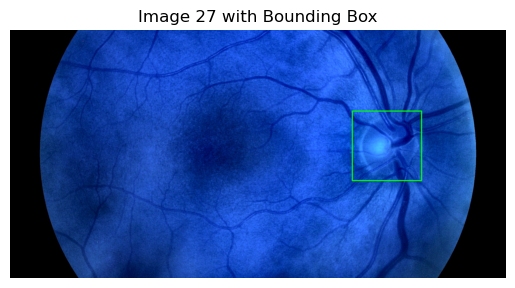

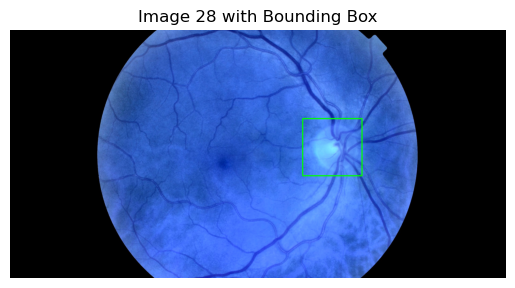

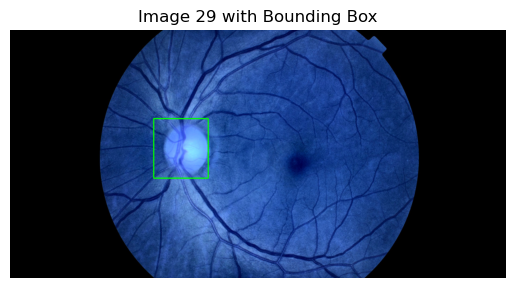

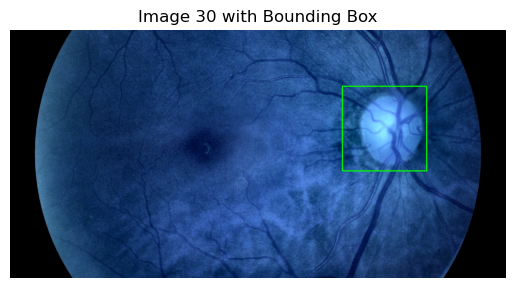

In [4]:
# Function to draw bounding boxes on images
def draw_bounding_box(image, bbox):
    x_adjusted, y_adjusted, width_adjusted, height_adjusted = bbox
    # Draw bounding box rectangle on image
    #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(image, (x_adjusted, y_adjusted), (x_adjusted + width_adjusted, y_adjusted + height_adjusted), (0, 255, 0), 4)
    return image

# Visualize images with bounding boxes
for i in range(len(images)):
    image = images[i].copy()  # Make a copy of the image to avoid modifying the original
    bbox = labels[i]  # Get the bounding box for the current image
    # Draw bounding box on image
    image_with_bbox = draw_bounding_box(image, bbox)
    # Display image with bounding box
    plt.imshow(image_with_bbox)
    plt.title(f"Image {i+1} with Bounding Box")
    plt.axis('off')
    plt.show()
    
    
## Matt: FYI these images are showing as blueish instead of redish since you have to display it as BRG instead of RGB.
## Look at some of my other code if you're interested in seeing how you display it correctly
## Leaving it as blue has no impact on the later steps, it's just a matter of how it displays


##use half the width to make a radius and make a circular mask

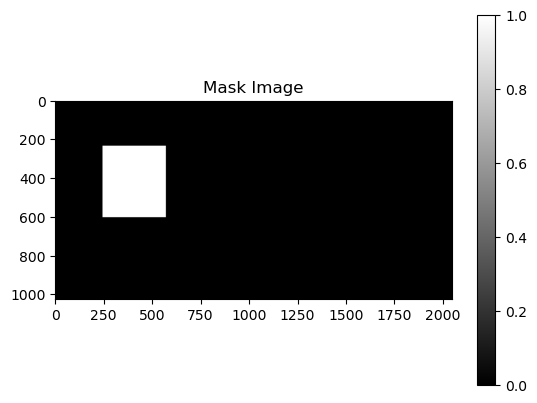

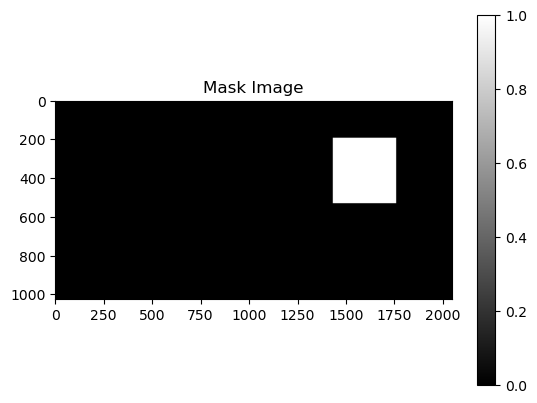

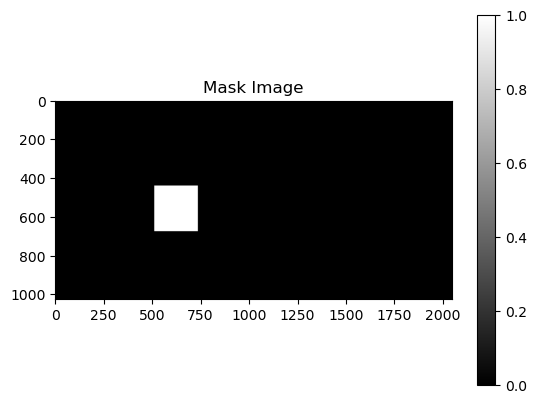

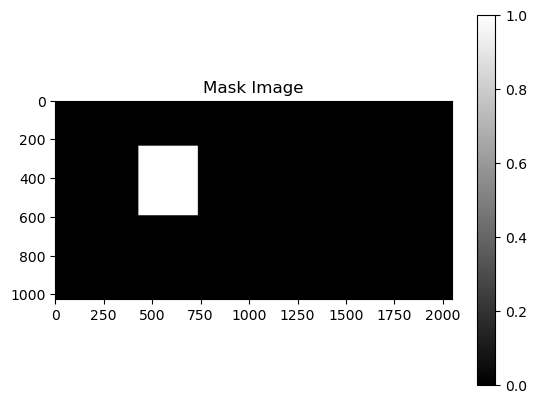

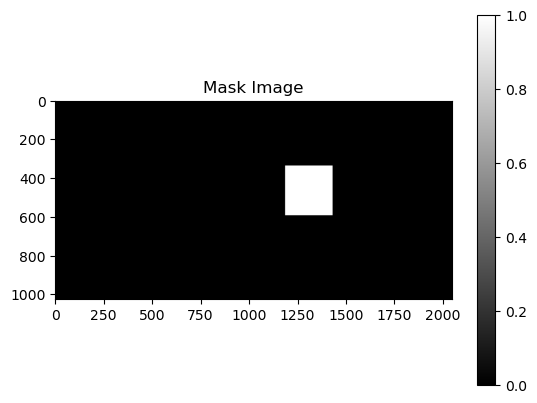

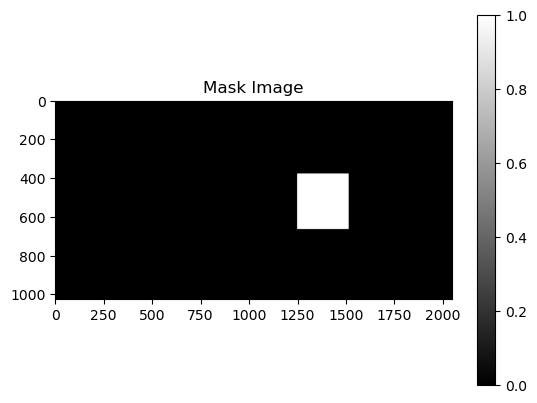

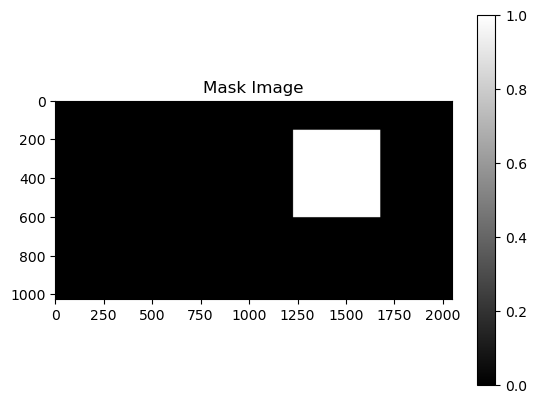

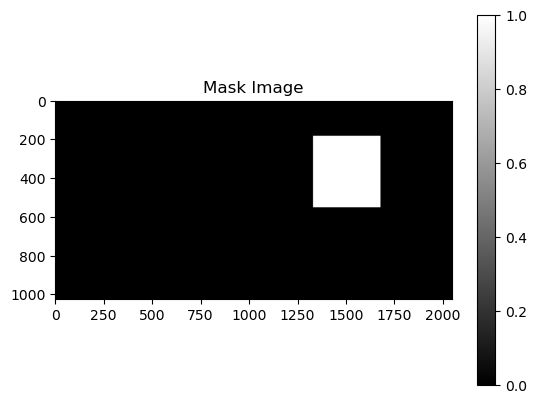

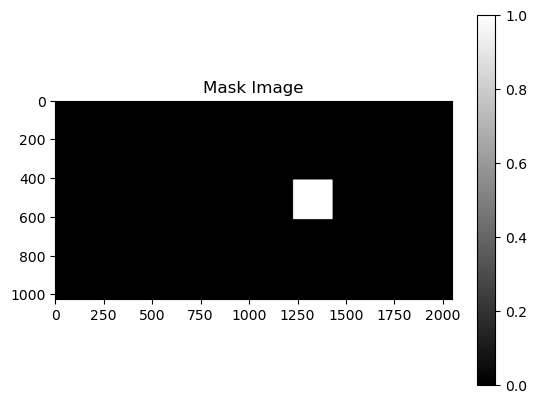

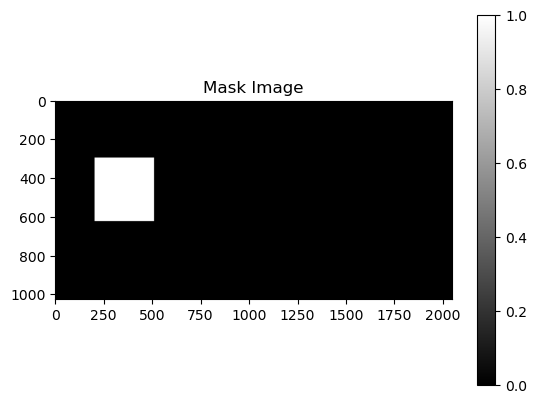

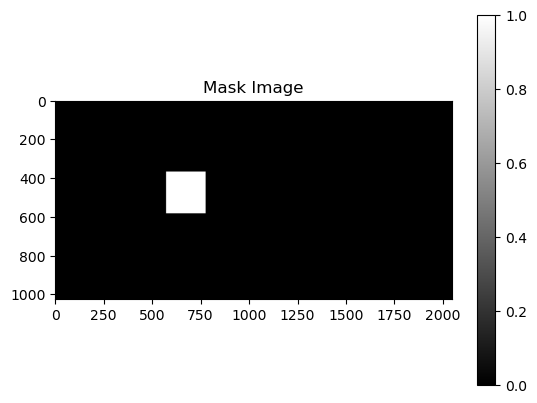

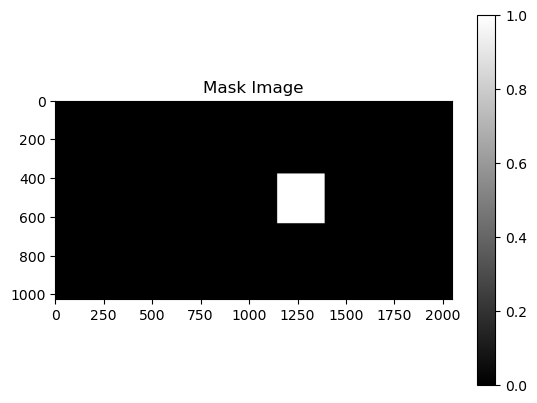

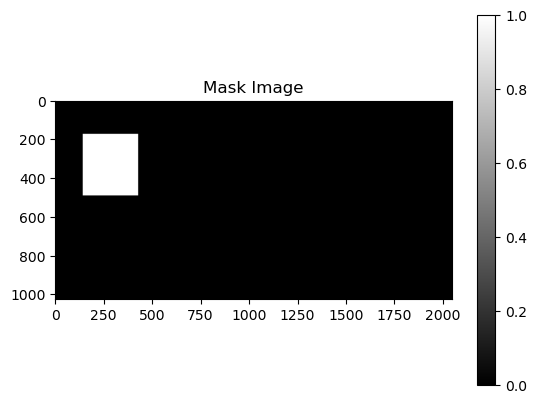

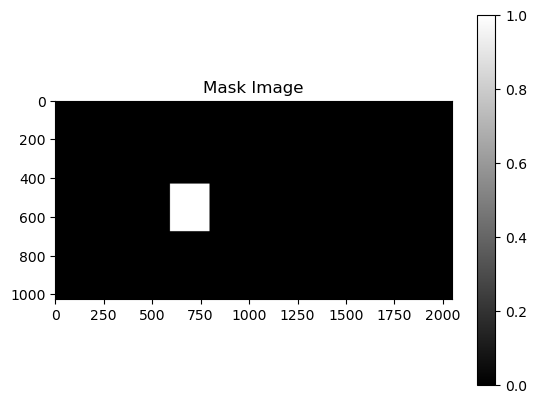

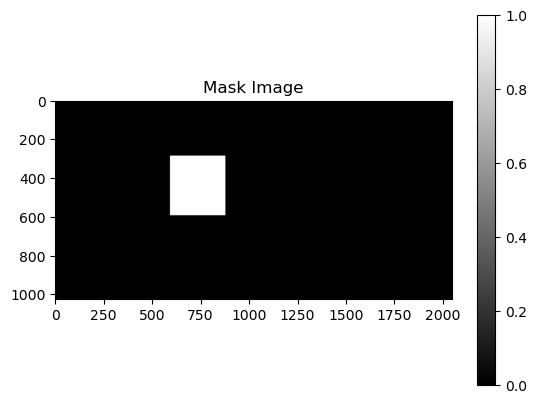

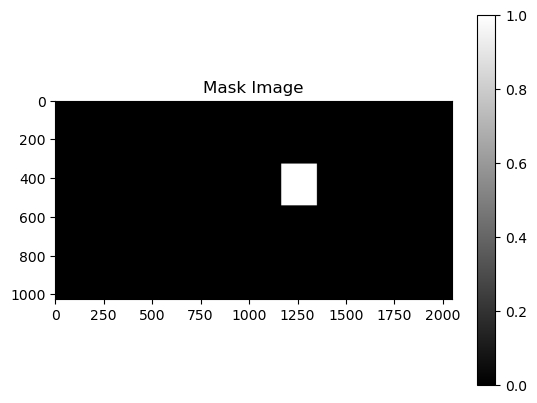

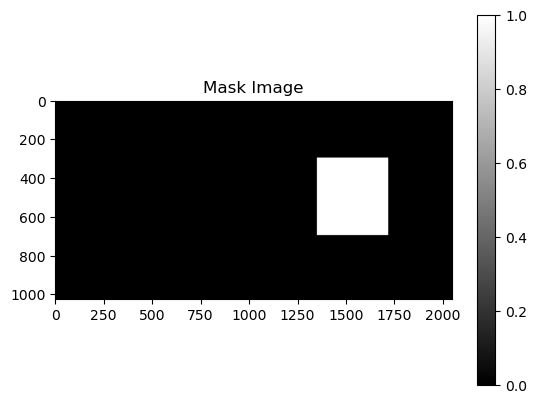

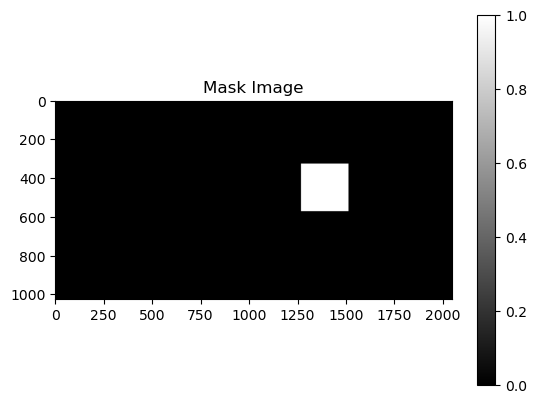

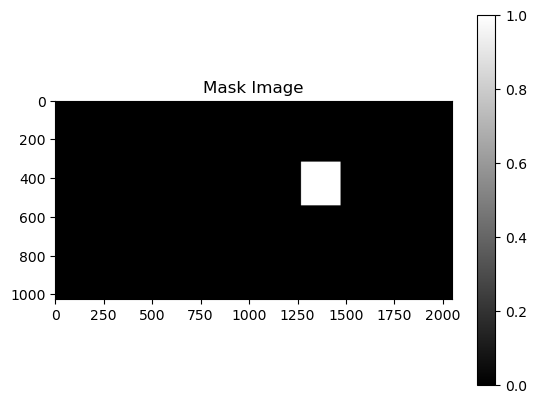

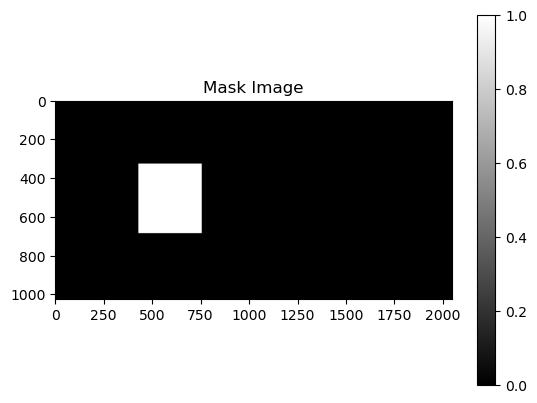

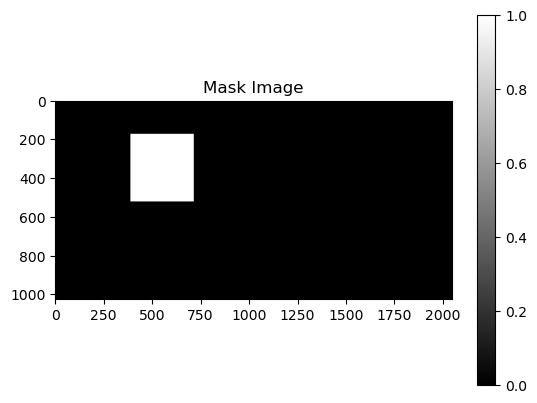

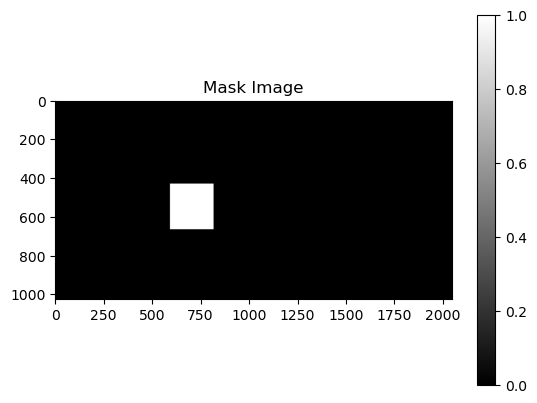

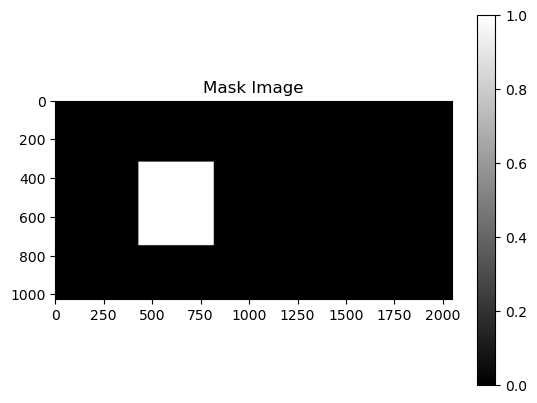

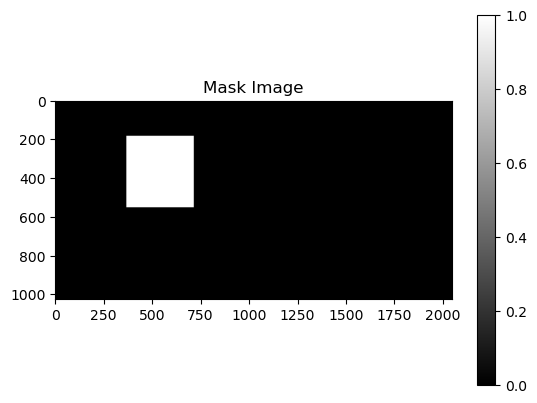

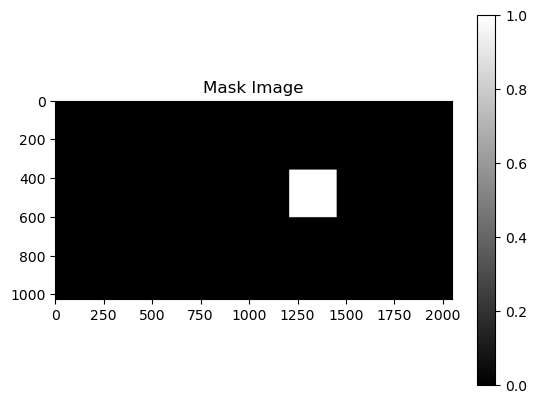

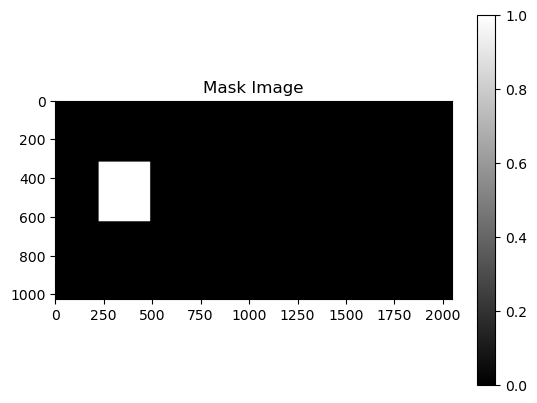

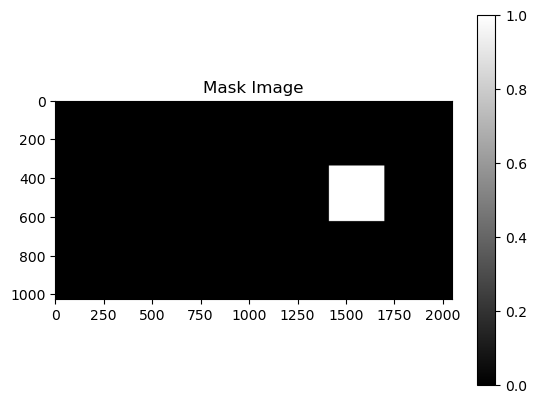

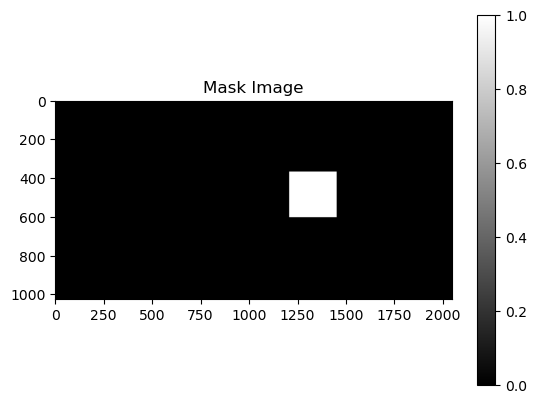

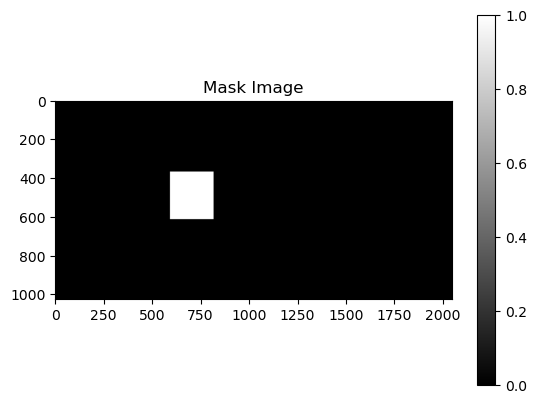

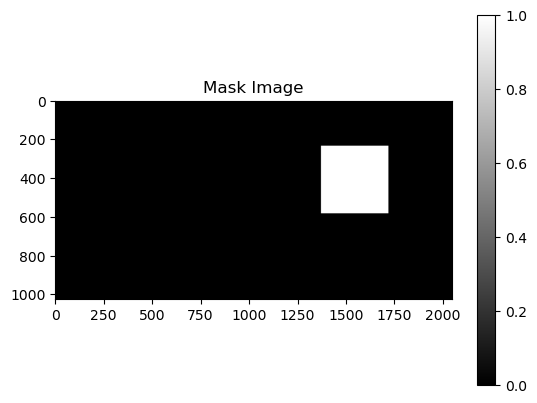

In [5]:
def create_binary_mask(image_shape, bbox):
    mask = np.zeros(image_shape, dtype=np.uint8)
    x, y, width, height = bbox
    mask[y:y+height, x:x+width] = 1
    return mask

def convert_bboxes_to_masks(images, bboxes):
    masks = []
    for image, bbox in zip(images, bboxes):
        mask = create_binary_mask(image.shape[:2], bbox)
        masks.append(mask)
    return masks

# Example usage:
# Assuming X_train contains input images and y_train contains bounding box labels
masks_train = convert_bboxes_to_masks(images, labels)
#masks_val = convert_bboxes_to_masks(X_val, y_val)

for image_mask in masks_train:
    
    plt.imshow(image_mask, cmap='gray')  # Display the mask as a grayscale image
    plt.title('Mask Image')
    plt.colorbar()  # Add color bar to show pixel intensity values
    plt.show()
    
    


In [6]:
#print(len(images))
print(len(masks_train))
type(masks_train[0])

30


numpy.ndarray

In [ ]:
## apply to new images

In [10]:
# Load the saved model
loaded_model = tf.keras.models.load_model("ROI_model.h5")

# Assuming new_images is a numpy array of new input images
# Normalize the new images
new_images_normalized = new_images / 255.0

# Make predictions (generate masks) using the loaded model
predicted_masks = loaded_model.predict(new_images_normalized)

# Display the first predicted mask (assuming predicted_masks[0] is the first mask)
plt.imshow(predicted_masks[0][:, :, 0], cmap='gray')  # Display the first mask (assuming grayscale)
plt.title('Predicted Mask')
plt.colorbar()
plt.show()


OSError: No file or directory found at ROI_model.h5

In [ ]:
from tensorflow.keras import optimizers

#Using U-Net Architecture to construct FCN for Segmentation of Optic Disk and Optic Cup 
#Performed on 30 pre-processed images which have bouding boxes around the area of interest and are cropped to uniform size 
#Use these 30 images to train the FCN to continue this segmentation with remaining images 

def bbox_unet (input_shape, num_classes): 
    inputs = tf.keras.Input (shape = input_shape)

    #Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)

    # Decoder
    up5 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv4)
    up5 = layers.concatenate([up5, conv3], axis=3)
    conv5 = layers.Conv2D(256, 3, activation='relu', padding='same')(up5)
    conv5 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv5)

    up6 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv5)
    up6 = layers.concatenate([up6, conv2], axis=3)
    conv6 = layers.Conv2D(128, 3, activation='relu', padding='same')(up6)
    conv6 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv6)

    up7 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv6)
    up7 = layers.concatenate([up7, conv1], axis=3)
    conv7 = layers.Conv2D(64, 3, activation='relu', padding='same')(up7)
    conv7 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv7)

    # Output
    outputs = layers.Conv2D(num_classes, 1, activation='sigmoid')(conv7)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Set input shape and create model
input_shape = (1024, 2048 , 3)# Adjust according to your input image size
num_classes = 1
model = bbox_unet(input_shape, num_classes)

# Split the data into training and validation sets
# Convert the lists to numpy arrays
X = np.array(images)
y = np.array(masks_train)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_val = X_val / 255.0

# Convert y_train and y_val to float and expand the dimensions
y_train = np.expand_dims(y_train, axis=-1)
y_val = np.expand_dims(y_val, axis=-1)

#y_train = np.squeeze(y_train, axis= 5)
#y_val = np.squeeze(y_val, axis= 5)

# Compile the model with Adam optimizer and reduced learning rate
opt = optimizers.Adam(clipvalue=0.5)
#opt = tf.keras.optimizers.Adam(clipvalue=0.5)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


# Add a learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)


# Data augmentation
data_gen_args = dict(rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     shear_range=0.1,
                     zoom_range=0.1,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
image_datagen.fit(X_train, augment=True, seed=seed)
mask_datagen.fit(y_train, augment=True, seed=seed)

# Train generator
image_generator = image_datagen.flow(X_train, batch_size=2, seed=seed)
mask_generator = mask_datagen.flow(y_train, batch_size=2, seed=seed)

# Combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

# Compute the total number of augmented images per epoch
total_samples = len(X_train)  # Number of original images
augmentation_factor = 15  # Number of augmented images generated per original image
images_per_epoch = total_samples * augmentation_factor

# Compute steps_per_epoch based on batch_size
batch_size = 5 #CHANGE THIS 
steps_per_epoch = images_per_epoch // batch_size

# Train the model
history = model.fit(train_generator, validation_data=(X_val, y_val), 
                    steps_per_epoch=steps_per_epoch, epochs=1, verbose=1)

model.save_weights("bbox_segmentation_weights.h5")
model.load_weights("bbox_segmentation_weights.h5")

# Calculate sensitivity and specificity for each epoch
sensitivity = []
specificity = []

def calculate_metrics_bbox(y_true, y_pred):
    #Assuming y_true and y_pred are numpy arrays
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    sensitivity  = tp / (tp + fn + K.epsilon())
    specificity = tn / (tn + fp + K.epsilon())
    
    return sensitivity, specificity

for i in range(len(history.history['val_loss'])):
    y_pred = model.predict(X_val)
    sens, spec = calculate_metrics_bbox(y_val, np.round(y_pred))  # Assuming y_pred needs to be rounded to 0 or 1
    sensitivity.append(sens)
    specificity.append(spec)
    print(f"Epoch {i+1}: Sensitivity = {sens}, Specificity = {spec}")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



2024-04-23 06:28:16.720034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-04-23 06:28:16.748876: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
